<a href="https://colab.research.google.com/github/RuslanFF1968/Pioneer/blob/main/Fraud_transaction_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task.

Achieving 91-92% accuracy in the task of finding the fraudulent transactions.


In [ ]:
from tensorflow.keras.models import Model, Sequential # загружаем абстрактный класс базовой модели сети от кераса и последовательную модель
from tensorflow.keras.datasets import mnist, fashion_mnist # загружаем готовые базы mnist
# Из кераса загружаем необходимые слои для нейросети
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization, Dropout, UpSampling2D
from tensorflow.keras import backend as K # подтягиваем базовые керасовские функции
from tensorflow.keras.optimizers import Adam # loading the required optimizer
from tensorflow.keras import utils # загружаем утилиты кераса
from google.colab import files # модуль для загрузки файлов в colab
import matplotlib.pyplot as plt # из библиотеки для визуализации данных возьмём интерфейс для построения графиков простых функций
from tensorflow.keras.preprocessing import image # модуль для отрисовки изображения
import numpy as np # библиотека для работы с массивами данных
import pandas as pd # библиотека для анализа и обработки данных
import seaborn as sns
from PIL import Image # модуль для отрисовки изображения
from sklearn.model_selection import train_test_split # модуль для разбивки выборки на тренировочную/тестовую
from sklearn.preprocessing import StandardScaler # модуль для стандартизации данных
import scipy.stats as stats
import scipy

from scipy.signal import savgol_filter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data input

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Базы/creditcard.csv") # db reading

In [ ]:
df[0:15] # outputting first fifteen lines

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
# Удаляем столбец со временем
data = df.drop(['Time'], axis=1)
# Нормализуем столбец с суммой транзакции
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

frauds = data[data.Class == 1] # записываем мошеннические операции
normal = data[data.Class == 0] # записываем нормальные операции

# Initial autoencoder

In [ ]:
frauds.shape # смотрим какие размеры у мошеннических операций

(492, 30)

In [ ]:
normal.shape # смотрим какие размеры у нормальных операций

(284315, 30)

In [ ]:
RANDOM_SEED = 42 # задаем случайное значение

# берём нормальные операции и разбиваем на train_test(только 'X')
X_train, X_test = train_test_split(normal, test_size=0.2, random_state=RANDOM_SEED)

In [ ]:
# Удаляем класс в обучающем наборе данных
X_train = X_train.drop(['Class'], axis=1)
# Добавляем все мошеннические транзакции в тестовый набор данных
X_test = pd.concat([X_test, frauds])
# Делаем метки для тестового набора данных
y_test = X_test['Class']
# Удаляем класс у тестового набора данных
X_test = X_test.drop(['Class'], axis=1)
# Преобразуем данные в массивы numpy
X_train = X_train.values
X_test = X_test.values

In [ ]:
print(X_train.shape) # взглянем на размеры обучающих данных

(227452, 29)


In [ ]:
def creditcardAutoencoder(): # объявляем автокодировщик для определения мошенич.транзакций
  dataSize = X_train.shape[1] # берём размеры X_train по второй оси(30)
  dataInput = Input(shape=(dataSize, )) # задаем эти размеры как входные в сеть

  x = Dense(10, activation='relu')(dataInput) # пропускаем через полносвязный слой размером 10
  x = Dense(dataSize, activation='linear')(x) # и через полносвязный слой размером 30

  autoencoder = Model(inputs=dataInput, outputs=x) # собрали модель

  autoencoder.compile(optimizer='Adam', loss='mse') # компилируем модель также, с выбором оптимайзера и среднеквадратичной ошибки

  return autoencoder

In [ ]:
model = creditcardAutoencoder()
history = model.fit(X_train, X_train,
                    epochs=50,
                    batch_size=32) # загружаем данные в модель(X_train'ы) и обучаем

Epoch 1/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.5913
Epoch 2/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.3586
Epoch 3/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.3517
Epoch 4/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.3539
Epoch 5/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.3531
Epoch 6/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.3581
Epoch 7/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.3501
Epoch 8/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.3579
Epoch 9/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.3506
Epoch 10/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.3521
Epoch 11/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.3520
Epoch 12/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.3528
Epoch 13/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.3571
Epoch 14/50
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.3575
Epoch 15/50
710

In [ ]:
predictions = model.predict(X_test) # делаем предсказание по X_test

1793/1793 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step


In [ ]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1) # определяем среднеквадратичную ошибку по X_test и предсказанием по X_test

In [ ]:
X_test.shape

(57355, 29)

In [ ]:
mse.shape

(57355,)

In [ ]:
mse_normal = mse[y_test.values == 0] # среднеквадратичная ошибка на нормальных операциях
mse_frauds = mse[y_test.values == 1] # среднеквадратичная ошибка на мошеннических операциях

In [ ]:
print("Минимальная ошибка нормальных транзакций:", round(min(mse_normal),4))
print("Максимальная ошибка нормальных транзакций:", round(max(mse_normal),4))
print("Средняя ошибка нормальных транзакций:", round(sum(mse_normal) / len(mse_normal),4))

Минимальная ошибка нормальных транзакций: 0.0385
Максимальная ошибка нормальных транзакций: 395.2229
Средняя ошибка нормальных транзакций: 0.3559


In [ ]:
print("Минимальная ошибка мошеннических транзакций:", round(min(mse_frauds),4))
print("Максимальная ошибка мошеннических транзакций:", round(max(mse_frauds),4))
print("Средняя ошибка мошеннических транзакций:", round(sum(mse_frauds) / len(mse_frauds),4))

Минимальная ошибка мошеннических транзакций: 0.1574
Максимальная ошибка мошеннических транзакций: 104.5421
Средняя ошибка мошеннических транзакций: 20.2082


In [ ]:
def getAccByBias(bias): # функция будет принимать какое то пороговое значение
  isNormal = mse_normal < bias # если ошибка меньше порога - то транзакция нормальная
  isFrauds = mse_frauds > bias # если ошибка больше порога - то транзакция мошенническая

  accNormal = sum(isNormal) / len(isNormal) # вычисляем процент нормальных операций
  accFaruds = sum(isFrauds) / len(isFrauds) # вычисляем процент мошеннических операций

  print("Распознано нормальных транзакций: ", round(100*accNormal), "%", sep="")
  print("Распознано мошеннических транзакций: ", round(100*accFaruds), "%", sep="")
  print("Средняя точность распознавания: ", round(50*(accNormal + accFaruds)), "%", sep="")

In [ ]:
getAccByBias(1.9) # выведем данные по распознаванию с конкретным пороговым значением

Распознано нормальных транзакций: 99%
Распознано мошеннических транзакций: 83%
Средняя точность распознавания: 91%


# Improved autoencoder ver.1

In [ ]:
def creditcardAutoencoder1(): # объявляем автокодировщик для определения мошенич.транзакций
  dataSize = X_train.shape[1] # берём размеры X_train по второй оси(30)
  dataInput = Input(shape=(dataSize, )) # задаем эти размеры как входные в сеть

  x = Dense(29, activation='relu')(dataInput) # пропускаем через полносвязный слой размером 10
  x = Dropout(0.2)(x)
  x = Dense(10, activation='relu')(x)
  x = Dropout(0.2)(x)
  x = Dense(dataSize, activation='linear')(x) # и через полносвязный слой размером 30

  autoencoder = Model(inputs=dataInput, outputs=x) # собрали модель

  autoencoder.compile(optimizer='Adam', loss='mse') # компилируем модель также, с выбором оптимайзера и среднеквадратичной ошибки

  return autoencoder

def creditCardAutoencoder2():
  ''' creditCardAutoencoder2 - функция автокодирования для определения мошенич.транзакций
  '''
  dataSize=X_train.shape[1] # берём размеры X_train по второй оси(30)
  dataInput=Input(shape=(dataSize, ))

  x=Dense(500,activation='relu')(dataInput)
  x=Dense(dataSize, activation='linear')(x)

  autoencoder=Model(inputs=dataInput, outputs=x) # собрали модель

  autoencoder.compile(optimizer='adam', loss='mse', metrics='accuracy')

  return autoencoder


In [ ]:
model1 = creditcardAutoencoder1()
history1 = model1.fit(X_train, X_train,
                    epochs=30,
                    batch_size=16) # загружаем данные в модель(X_train) и обучаем

Epoch 1/30
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 0.7535
Epoch 2/30
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.6031
Epoch 3/30
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.6024
Epoch 4/30
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 0.5941
Epoch 5/30
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 0.5923
Epoch 6/30
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 0.5837
Epoch 7/30
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.5926
Epoch 8/30
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.5907
Epoch 9/30
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.5938
Epoch 10/30
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.5851
Epoch 11/30
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.5893
Epoch 12/30
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.5911
Epoch 13/30
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 0.5910
Epoch 14/30
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - 

In [ ]:
predictions1 = model1.predict(X_test) # делаем предсказание по X_test
mse = np.mean(np.power(X_test - predictions1, 2), axis=1) # определяем среднеквадратичную ошибку по X_test и предсказанием по X_test
mse_normal = mse[y_test.values == 0] # среднеквадратичная ошибка на нормальных операциях
mse_frauds = mse[y_test.values == 1] # среднеквадратичная ошибка на мошеннических операциях
print("Минимальная ошибка нормальных транзакций:", round(min(mse_normal),4))
print("Максимальная ошибка нормальных транзакций:", round(max(mse_normal),4))
print("Средняя ошибка нормальных транзакций:", round(sum(mse_normal) / len(mse_normal),4))
print("Минимальная ошибка мошеннических транзакций:", round(min(mse_frauds),4))
print("Максимальная ошибка мошеннических транзакций:", round(max(mse_frauds),4))
print("Средняя ошибка мошеннических транзакций:", round(sum(mse_frauds) / len(mse_frauds),4))


1793/1793 ━━━━━━━━━━━━━━━━━━━━ 2s 985us/step
Минимальная ошибка нормальных транзакций: 0.0701
Максимальная ошибка нормальных транзакций: 500.3479
Средняя ошибка нормальных транзакций: 0.4668
Минимальная ошибка мошеннических транзакций: 0.1454
Максимальная ошибка мошеннических транзакций: 134.1589
Средняя ошибка мошеннических транзакций: 19.6156


In [ ]:
def smoothing1(x,window_len=11):     #Функция сглаживания
    s=np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    w=np.ones(window_len,'d')
    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

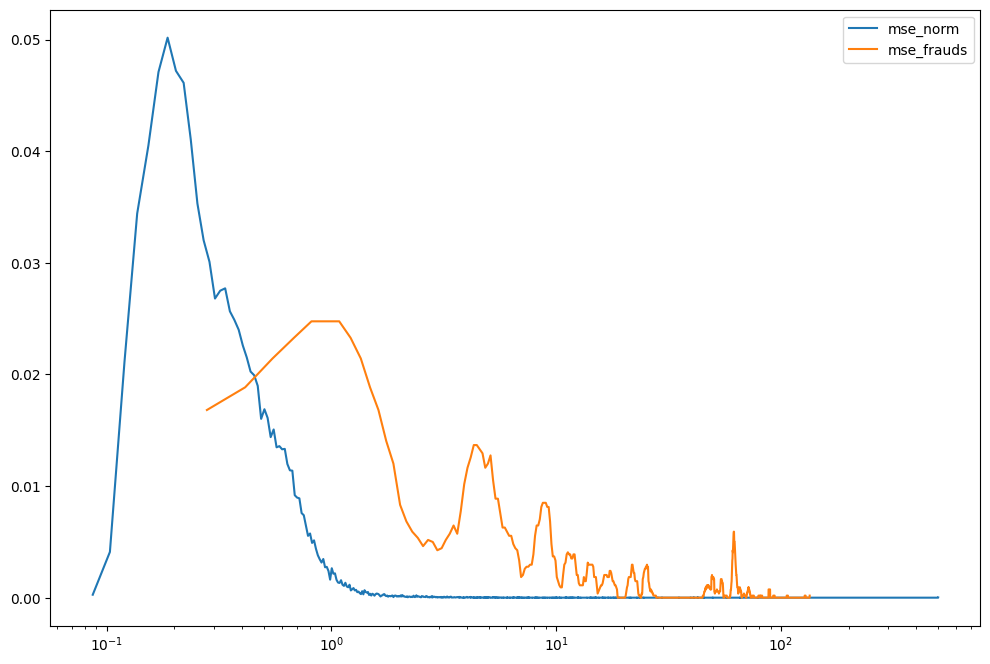

In [ ]:
histogram, bins = np.histogram(mse_normal, bins=30000,  weights=np.ones_like(mse_normal)/len(mse_normal))
histogram1, bins1 = np.histogram(mse_frauds, bins=1000, weights=np.ones_like(mse_frauds)/len(mse_frauds))

smothed = smoothing1(histogram1)

plt.figure(figsize=(12, 8))

plt.plot(bins[1:], histogram, label="mse_norm")
plt.plot(bins1[1:], smothed[:-10], label="mse_frauds")
plt.xscale('log')
plt.legend()
plt.show()

In [ ]:
np.std(mse_normal)/3+np.min(mse_frauds)/2

np.float64(0.8461504649919207)

In [ ]:
getAccByBias(0.97) # выведем данные по распознаванию с конкретным пороговым значением

Распознано нормальных транзакций: 95%
Распознано мошеннических транзакций: 85%
Средняя точность распознавания: 90%


In [ ]:
for i in np.linspace(0.7, 0.999, 20):
    getAccByBias(i)
    print()

Распознано нормальных транзакций: 87%
Распознано мошеннических транзакций: 87%
Средняя точность распознавания: 87%

Распознано нормальных транзакций: 88%
Распознано мошеннических транзакций: 87%
Средняя точность распознавания: 88%

Распознано нормальных транзакций: 89%
Распознано мошеннических транзакций: 87%
Средняя точность распознавания: 88%

Распознано нормальных транзакций: 90%
Распознано мошеннических транзакций: 87%
Средняя точность распознавания: 88%

Распознано нормальных транзакций: 90%
Распознано мошеннических транзакций: 87%
Средняя точность распознавания: 88%

Распознано нормальных транзакций: 91%
Распознано мошеннических транзакций: 86%
Средняя точность распознавания: 88%

Распознано нормальных транзакций: 91%
Распознано мошеннических транзакций: 86%
Средняя точность распознавания: 89%

Распознано нормальных транзакций: 92%
Распознано мошеннических транзакций: 86%
Средняя точность распознавания: 89%

Распознано нормальных транзакций: 92%
Распознано мошеннических транзакци

In [ ]:
np.linspace(0.7, 0.999, 20)

array([0.7       , 0.71573684, 0.73147368, 0.74721053, 0.76294737,
       0.77868421, 0.79442105, 0.81015789, 0.82589474, 0.84163158,
       0.85736842, 0.87310526, 0.88884211, 0.90457895, 0.92031579,
       0.93605263, 0.95178947, 0.96752632, 0.98326316, 0.999     ])